# Ice shelf base angles

Satellite data: 
- Bedmachine, Morlighem et al. (2020) data: https://nsidc.org/data/nsidc-0756/versions/3  paper: https://www.nature.com/articles/s41561-019-0510-8


Plot angle beneath ice from x and y gradients


In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import scipy.io as sio

rho_ow = 1028
rho_ice = 917

paired = sns.color_palette("Paired", 10)

from dask.distributed import Client
import cmocean as cm
import cmcrameri

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import pyproj as proj4
from pyproj import Transformer

import xarray as xr

In [2]:
# open polar projection used for all of these products
epsg4326 = proj4.CRS.from_epsg(4326) # Lat Lon WGS84
epsg3031 = proj4.CRS.from_epsg(3031) # SouthPolarStereo WGS84

#transformer = Transformer.from_crs(epsg4326, epsg3031)
transformer = Transformer.from_crs( epsg3031,epsg4326)


In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42877,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:41207,Total threads: 2
Dashboard: /proxy/34433/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:34033,


In [7]:
# open bedmachine data
BedMachine = xr.open_dataset('/g/data/x77/cy8964/satellite-meltrate/Adusumilli/BedMachineAntarctica-v3.nc',
                            chunks = {'x':1000,'y':1000})
BedMachine.mask

<xarray.DataArray 'mask' (y: 13333, x: 13333)> Size: 178MB
dask.array<open_dataset-mask, shape=(13333, 13333), dtype=int8, chunksize=(1000, 1000), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int32 53kB -3333000 -3332500 -3332000 ... 3332500 3333000
  * y        (y) int32 53kB 3333000 3332500 3332000 ... -3332500 -3333000
Attributes:
    long_name:      mask
    grid_mapping:   mapping
    valid_range:    [0 4]
    flag_values:    [0 1 2 3 4]
    flag_meanings:  ocean ice_free_land grounded_ice floating_ice lake_vostok
    source:         Antarctic Digital Database (rock outcrop) and Jeremie Mou...

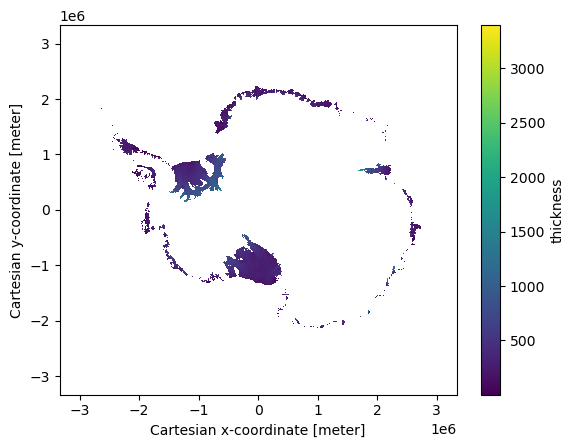

In [8]:
# plot draft of ice shelves, assuming ice density 900 and water 1030
draft = BedMachine.thickness.where(BedMachine.mask ==3)*900/1030
draft.plot()

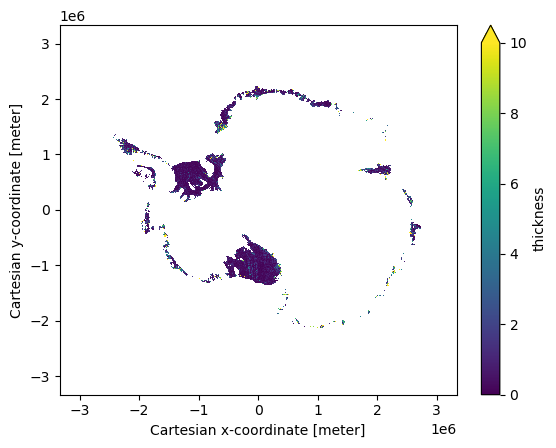

In [10]:
#calculate local angle from difference in thickness between neighbouring cells (crude gradient)

dhdx = draft.diff("x")/500
dhdy = draft.diff("y")/500

local_slope = np.sqrt((dhdx)**2+(dhdy)**2)
local_angle_manual = np.arctan(local_slope)*180/np.pi    

local_angle_manual.plot(vmax = 10)

In [12]:
dhdx = draft.diff("x")/500
dhdy = draft.diff("y")/500

local_slope = np.sqrt((dhdx)**2+(dhdy)**2)
local_angle_manual = np.arctan(local_slope)*180/np.pi    
local_angle_manual = local_angle_manual.load()

(-800000.0, 500000.0)

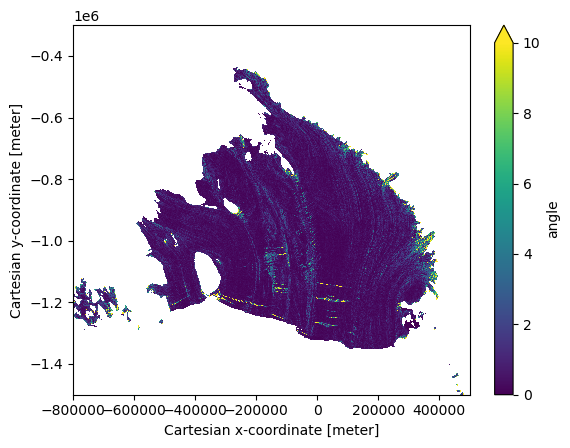

In [50]:
#plot Ross Ice Shelf
local_angle_manual.plot(vmax = 10, cbar_kwargs = {'label':'angle'})
plt.ylim(-1.5e6,-0.3e6)
plt.xlim(-0.8e6,0.5e6)

(-1600000.0, -500000.0)

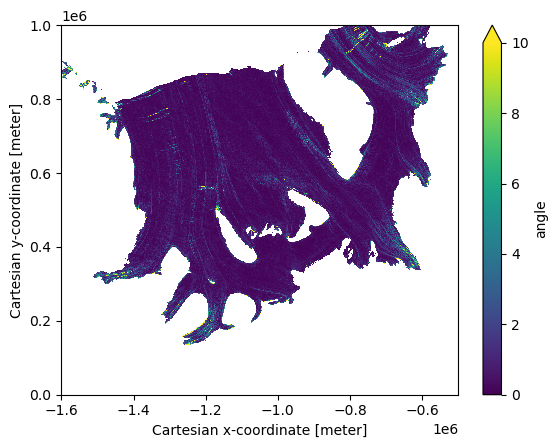

In [52]:
#plot Weddell Ice Shelf
local_angle_manual.plot(vmax = 10, cbar_kwargs = {'label':'angle'})
plt.ylim(0e6,1e6)
plt.xlim(-1.6e6,-0.5e6)

(1500000.0, 2200000.0)

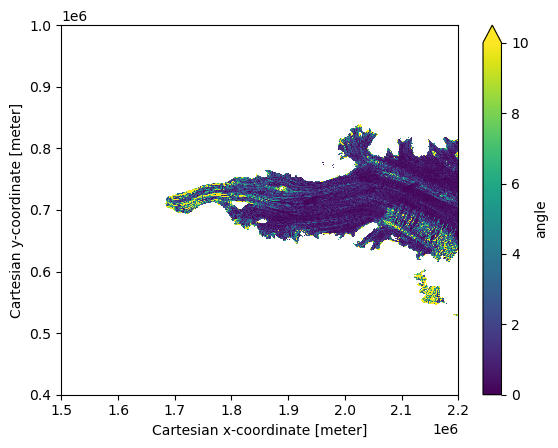

In [51]:
#plot Amery Ice Shelf
local_angle_manual.plot(vmax = 10, cbar_kwargs = {'label':'angle'})
plt.ylim(0.4e6,1e6)
plt.xlim(1.5e6,2.2e6)

Text(0, 0.5, 'area (km^2)')

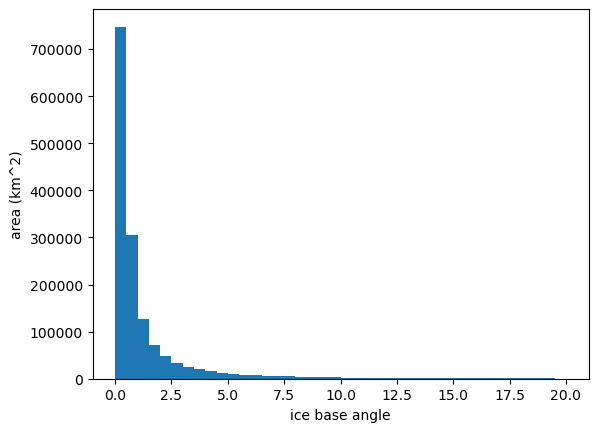

In [36]:
# plot distribution
vals,bins,a = plt.hist(np.ravel(local_angle_manual),bins = np.linspace(0,20,41),
                                      weights = np.ravel(local_angle_manual)*0+0.5**2)
plt.xlabel('ice base angle')
plt.ylabel('area (km^2)')

In [49]:
bin_centre = np.arange(0.25,20.1,0.5)
idx = bin_centre >=10

percent_area_steeper_than_10deg = np.sum(vals*idx)/np.sum(vals)
print(percent_area_steeper_than_10deg*100)

idx = bin_centre<1

percent_area_shallower_than_1deg = np.sum(vals*idx)/np.sum(vals)
print(percent_area_shallower_than_1deg*100)


1.6042245430633983
70.7009664448468


1.9791016556374497
70.43160351707925


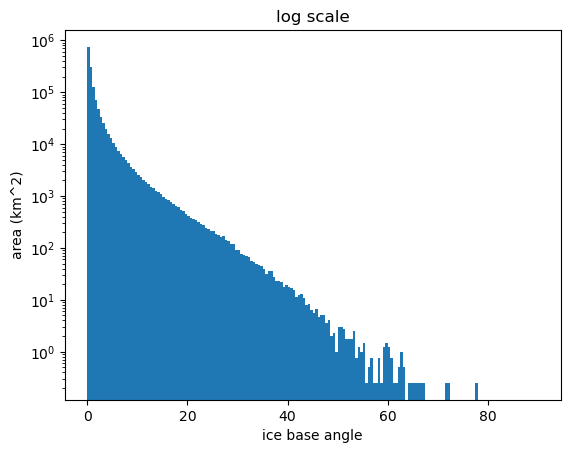

In [54]:
# log scale
vals,bins,a = plt.hist(np.ravel(local_angle_manual),bins = np.linspace(0,90,181),
                                      weights = np.ravel(local_angle_manual)*0+0.5**2)
plt.xlabel('ice base angle')
plt.ylabel('area (km^2)')
plt.yscale('log')
plt.title('log scale')

bin_centre = np.arange(0.25,90.1,0.5)
idx = bin_centre >=10

percent_area_steeper_than_10deg = np.sum(vals*idx)/np.sum(vals)
print(percent_area_steeper_than_10deg*100)

idx = bin_centre<1

percent_area_shallower_than_1deg = np.sum(vals*idx)/np.sum(vals)
print(percent_area_shallower_than_1deg*100)


This analysis suggests that 70% of the Antarctic ice shelf area has weak local slopes of less than 1 degrees. Only 2% has slopes larger than 10 degrees.